In [4]:
from mlswarm import neuralnet 

#DATASET-------------------------------
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, Y = make_moons(n_samples = 2000, noise=0.2, random_state=100)
Y = Y.reshape((Y.shape[0],1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)

1


In [8]:
nn_architecture = [
    {"input_dim": 2, "output_dim": 5, "activation": "step"},
    {"input_dim": 5, "output_dim": 10, "activation": "step"},
    {"input_dim": 10, "output_dim": 5, "activation": "step"},
    {"input_dim": 5, "output_dim": 1, "activation": "step"},
]

#CREATE NEURAL NETWORK
nn1 = neuralnet(nn_architecture)

#INITIALIZE CLOUD WITH 150 PARTICLES ACCORDING TO XAVIER INITIALIZATION
nn1.init_cloud(N = 150)

#TRAINING
nn1.train(X = X_train, Y = Y_train, 
          method = "swarm_derivfree", 
          max_epochs= 300, n_batches = 1, batch_size = X_train.shape[0],
          learning_rate = 0.5, var_epsilon = 0.001,
          cost_type = "error_binary_classification",
          kernel_a = "auto", alpha_init = 0, alpha_rate = 1, beta = 0, gamma = 2, 
          verbose = False)

Finding kernel constant...
Kernel constant found: 0.01

Training started...
Maximum amount of epochs reached

Function value at cloud mean: 0.04249999999999998
Cost function evaluated 45000 times

The clock time (CPU time) for train_nn was 39.15800 (156.14062) seconds


Test set accuracy using particle 0: 0.94750
Test set accuracy using cloud mean: 0.94750


<Figure size 432x288 with 0 Axes>

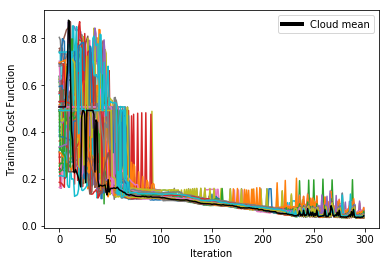

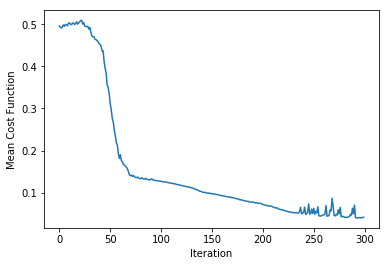

In [11]:
#PLOT COST HISTORY
nn1.plot_cost_history()

#ACCURACY ON TEST SET USING PARTICLE 0 WEIGHTS
nn1.prediction_accuracy_particle(X_test, Y_test, acc_type = "binary_accuracy", particle = 0)

#ACCURACY ON TEST SET USING CLOUD MEAN WEIGHTS
nn1.prediction_accuracy_mean_particle(X_test, Y_test, acc_type = "binary_accuracy")

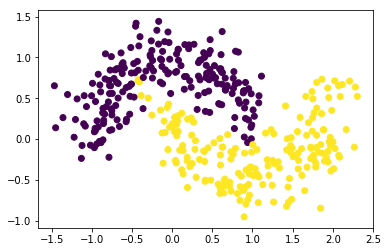

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 

#CLASSIFICATION VISUALIZED
Y_test_hat = nn1.forward_propagation(X_test, cloud = nn1.get_cloud_mean())
plt.scatter(X_test[:,0],X_test[:,1], c = Y_test_hat.flatten())